# Environment Functions

Behave has a set of **test fixtures** that you could run **before** or **after** `feature`, `scenarios`, `steps`, or `tags` to control the test execution environment.

Let's look at each of these functions.

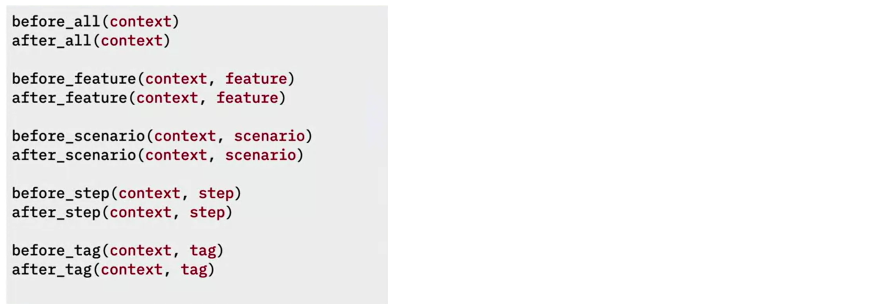

One set of test fixtures includes **`before_all()`** and **`after_all()`**.
* As their name implies, any code you place in these fixtures will execute once **before all the features** and then again **after all the features**.
* This set is ideal for setting up web drivers from tools like Selenium.
* With Selenium drivers, you can use a real browser to perform your testing.
* This set is also ideal for establishing the context values that all the steps can access and for shutting down any drivers after Behave processes all the features.

The next point is **`before _feature()`** and **`after_feature()`**.
* These functions run before and after each feature.
* Every feature pass-in is an instance of the feature class.
* If you use multiple features, this set can be ideal for setting up a clean environment before and after each feature runs.

The next control set is **`before_scenario()`** and **`after_scenario()`**.
* As you might have guessed from their names, these functions run before and after each scenario.
* The scenario is passed in as an instance of the scenario class.
* With these functions, you could have even more granular control over each scenario execution environment.

Then there's **`before_step()`** and **`after_step()`**.
* These run before and after every step.
* The step passed in is an instance of the step class.
* That's very granular control.
* I have never found a need to modify the environment between every step, but you can do it if you need to.

One final set of functions that control the environment is **`before_tag()`** and **`after_tag()`**.
* I don't cover tags in this course because tagging is a more advanced function, so I'll only discuss these functions briefly.
* You can tag sections of your feature file with a name and then these functions run before and after the section tag with a given name.
* Behave invokes tags by the order they're found in the feature file.


# Set up `environment.py`

You set up your behave environment in a file called **`environment.py`**, and this is where you declare your test fixtures.

Let's look at a simple `environment.py` that uses the **`before_all()`** and **`after_all()`** functions.

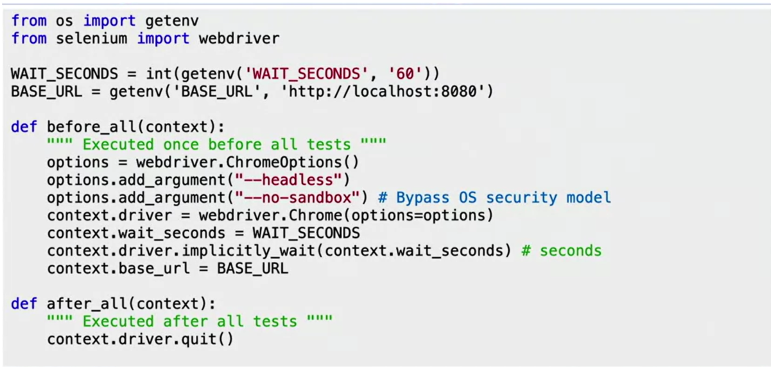

You start with your imports.
* You need to import any configuration parameters from the environment.
* So first, you should import the `getenv` function from the `os` package.
* In this example, you will also use Selenium to manipulate your application's user interface during the test.
* Next import is `webdriver` from the `selenium` package.

Next, you should declare any **global variables** you want to get from the environment.
* In this example, you get an environment variable called `WAIT_SECONDS` that controls how long Selenium waits for a response from the UI.
* You will also get an environment variable called `BASE_URL` that tells you the location of the system under test.
* By changing the `BASE_URL` environment variable, you can point Behave to your local computer or any remote computer that you want to test.

The first function you define is `before_all()`, which will run before Behave processes any feature files.
* Notice that this function has one parameter passed in, the `context`.
* This `context` will be passed to every step in your test suite.
* Therefore, anything you assign to this `context` will be available to all of the steps.
* The first item you define and place in the context is the `webdriver`.
* You set the options to use **Headless Chrome driver**, but you could have used **Firefox** or **Safari** driver or any number of other drivers.
* The only prerequisite is that web browser is installed in the test system that's running Behave.
* You assign this driver to a variable called `driver` in the `context`.
* Again, this `context` is passed to each step, thus, all the steps will have access to the `webdriver` by simply referencing `context.driver` and we'll use it to drive their actions on the UI.
* Next, you save the `WAIT_SECONDS` global variable in the `context`.
* That way, all the steps can access it to know how long to wait for the UI to respond.
* You then set an attribute on the `webdriver` to implicitly wait this number of seconds by default.
* Finally, you create a variable called `base_url` in the `context` and set it to the global variable `BASE_URL` that you got from the environment.
* This way every step, we'll know what URL to run the test against.
* All of these Python statements will execute once before Behave processes any of the feature files.
* Together these statements set up the initial environment for running the BDD tests.

The last function that you define is, **`after_all()`**, and it has one line of code, `context.driver.quit()`. 

This function tells the web browser to close down after all tests are complete, ensuring that you don't leave multiple web browsers running in memory afterwards.

Obviously, you could add more **text fixtures** to this file and you can have them execute before and after each **feature**, **scenario**, **step**, or **tag**.

This one file **`environment.py`** controls the environment at whatever level of granularity you need.
